In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from math import log
from sklearn import preprocessing

/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Gonna get freaky

In [2]:

avocado = pd.read_csv('avocado_lon_lat.csv', index_col=0)
avocado.head()
avo = pd.read_csv("avo.csv",index_col='Date')


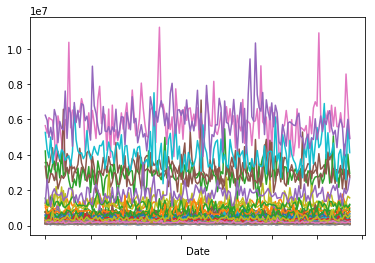

In [3]:
avo.groupby('region')['Total Volume'].plot()
plt.show()

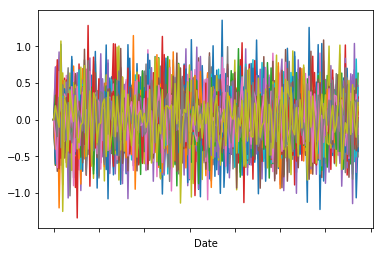

In [4]:
avo['logVol'] = avo.groupby('region')['Total Volume'].transform(np.log)
avo['logDiffVol'] = avo.groupby('region').logVol.diff().fillna(0)
avo.groupby('region').logDiffVol.plot()
plt.show()

In [5]:
avo.to_csv('avo.csv')

Starting Factor Model here!

$price = \bar{price} + lat*price_{diff} + lon*price_{diff} + volume + noise$

$-noise = \bar{price} + lat*price_{diff} + lon*price_{diff} + volume - price$

In [6]:
avo = avocado[avocado.type == 'conventional'][['AveragePrice', 'lon', 'lat', 'region', 'Total Volume']]
avo.head()

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60


In [7]:
avo.sort_index(inplace=True)
avo.sort_values('region')

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2017-04-23,1.34,-73.754968,42.651167,Albany,89327.10
2017-07-09,1.52,-73.754968,42.651167,Albany,101331.41
2015-10-25,1.07,-73.754968,42.651167,Albany,74338.76
2015-11-01,1.02,-73.754968,42.651167,Albany,99811.42
2017-07-02,1.56,-73.754968,42.651167,Albany,98282.07
2015-05-31,1.23,-73.754968,42.651167,Albany,95123.62
2017-06-25,1.53,-73.754968,42.651167,Albany,89303.04
2015-11-08,0.98,-73.754968,42.651167,Albany,109428.33
2017-06-18,1.58,-73.754968,42.651167,Albany,97079.34


In [8]:
temp = min_max_scaler.fit_transform(x)

NameError: name 'min_max_scaler' is not defined

In [ ]:
avo = avo[avo.region != 'Southeast']
avo = avo[avo.region != 'NorthernNewEngland']
avo = avo[avo.region != 'WestTexNewMexico']
avo = avo[avo.region != 'West']
avo = avo[avo.region != 'TotalUS']

In [9]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = avo[['lon']].values.astype(float)
lon_scaled = min_max_scaler.fit_transform(x)
avo['lon_scaled'] = lon_scaled
x = avo[['lat']].values.astype(float)
lat_scaled = min_max_scaler.fit_transform(x)
avo['lat_scaled'] = lat_scaled
avo.head()

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled
Date,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.942881,-0.355341
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,-0.307400,-0.163548
2015-01-04,0.98,14.520858,59.674971,Southeast,3204112.16,1.000000,1.000000
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,-0.343140,0.025526
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.890303,-0.386914


In [10]:
avo['logPrice'] = avo.AveragePrice.apply(np.log)
avo['logPriceDiff'] = avo.groupby('region').logPrice.transform(pd.Series.diff).fillna(0)
avo.head()

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff
Date,,,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.942881,-0.355341,-0.072571,0.0
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,-0.307400,-0.163548,0.095310,0.0
2015-01-04,0.98,14.520858,59.674971,Southeast,3204112.16,1.000000,1.000000,-0.020203,0.0
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,-0.343140,0.025526,0.336472,0.0
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.890303,-0.386914,-0.223144,0.0


In [11]:
first_day = avo[avo.index == '2015-01-11']
first_day.sort_values('region', inplace=True)
avo.sort_values('region', inplace=True)
first_day.set_index('region', inplace=True)
first_day['region_mean'] = avo.groupby('region').logPriceDiff.mean()
first_day.head()

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AveragePrice,lon,lat,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,region_mean
region,,,,,,,,,
Albany,1.24,-73.754968,42.651167,41195.08,-0.286866,-0.004333,0.215111,0.016261,0.001492
Atlanta,1.11,-84.390185,33.749099,397542.72,-0.441904,-0.529518,0.104360,0.104360,0.000232
BaltimoreWashington,1.17,-76.610759,39.290882,670231.94,-0.328497,-0.202576,0.157004,0.080043,0.000770
Boise,1.18,-116.200835,43.616560,57355.52,-0.905633,0.052621,0.165514,0.155564,0.001402
Boston,1.10,-71.058291,42.360253,437771.89,-0.247554,-0.021496,0.095310,0.075508,0.001831


In [12]:
len(first_day)

54

In [13]:
first_day.head()

,AveragePrice,lon,lat,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,region_mean
region,,,,,,,,,
Albany,1.24,-73.754968,42.651167,41195.08,-0.286866,-0.004333,0.215111,0.016261,0.001492
Atlanta,1.11,-84.390185,33.749099,397542.72,-0.441904,-0.529518,0.104360,0.104360,0.000232
BaltimoreWashington,1.17,-76.610759,39.290882,670231.94,-0.328497,-0.202576,0.157004,0.080043,0.000770
Boise,1.18,-116.200835,43.616560,57355.52,-0.905633,0.052621,0.165514,0.155564,0.001402
Boston,1.10,-71.058291,42.360253,437771.89,-0.247554,-0.021496,0.095310,0.075508,0.001831


In [14]:
avo['Date'] = avo.index
temp = avo.copy()
temp.set_index('region', inplace=True)
y = temp.groupby('Date').apply(lambda row: row.logPriceDiff)
X = temp.groupby('Date').apply(lambda row: np.column_stack([[1]*len(row.lat_scaled),list(row.lat_scaled),list(row.lon_scaled)]))
#avo.groupby('Date').apply(lambda row: y=row.logPriceDiff, np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)]))



In [15]:
y = y.as_matrix()

In [16]:
betas = []
for idx in range(len(y)):
  betas.append(np.dot(np.dot(np.linalg.inv(np.dot(X[idx].T, X[idx])), X[idx].T), y[idx]))

In [17]:
betas[:10]

[array([ 0.,  0.,  0.]),
 array([ 0.11737737, -0.04392826,  0.07160161]),
 array([ 0.00185234,  0.01510637, -0.04668309]),
 array([-0.03197876,  0.0340885 , -0.0513836 ]),
 array([-0.12631576,  0.0448997 ,  0.02498838]),
 array([ 0.06058389, -0.09148402,  0.02458305]),
 array([ 0.08458991,  0.08742467, -0.05203757]),
 array([-0.01851386, -0.03650057,  0.02823895]),
 array([-0.06170173, -0.04513882,  0.01103905]),
 array([ 0.06187182,  0.00034242, -0.00296746])]

In [18]:
np.asarray(betas).tofile('betas_int_lat_lon.npy')

In [19]:
#np.dot(X.T, X)
np.dot(X.as_matrix()[0].T, X.as_matrix()[0])

array([[ 54.        , -13.34328077, -27.07274022],
       [-13.34328077,   9.93390598,   9.47998384],
       [-27.07274022,   9.47998384,  20.46665705]])

In [20]:
first_day = avo[avo.index == '2015-01-11']
first_day.sort_values('region', inplace=True)
avo.sort_values('region', inplace=True)
first_day.set_index('region', inplace=True)
y = np.asarray(first_day.logPriceDiff)
X = np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)])
Betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#first_day
y = np.asarray(first_day.logPriceDiff)
X = np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)]) # add in volume, etc

# do anova for the models to see which factors help the most <--- also look at SSE

# probably a lot of mean reversion in the factors over time

#print(y, X)
Betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# on average all prices went up 0.08, and each unit lon

In [22]:
error = y - np.dot(X, Betas.T)

sse = np.dot(error, error)

sse

0.34220794005789362

In [23]:
error

array([-0.08076714, -0.00463713, -0.02271256,  0.10534304, -0.02508881,
        0.00362347, -0.07628597, -0.0517108 , -0.04915894, -0.05054668,
       -0.00827094, -0.07190007,  0.02425099, -0.02114668, -0.0029322 ,
       -0.00760018,  0.08238161,  0.16337849, -0.01385078,  0.11178872,
        0.09207411,  0.07994612, -0.07287271,  0.03627925,  0.14327439,
       -0.04088405, -0.03259609, -0.08149814,  0.10472998,  0.08824933,
       -0.13850754,  0.12900771,  0.12422191, -0.14438969, -0.08317344,
       -0.01497682,  0.04071872, -0.07694599, -0.08889279, -0.0782823 ,
       -0.02035674, -0.21403857, -0.01924086,  0.05523804, -0.02792406,
       -0.06021348,  0.04066642,  0.029185  ,  0.02458736, -0.00711707,
        0.11952245, -0.02121563, -0.00871399,  0.11998174])

look for a pattern for the factors... ARIMA for the OLS output

In [24]:
avo[avo.index == '2015-01-04']

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,Date
Date,,,,,,,,,,
2015-01-04,1.22,-73.754968,42.651167,Albany,40873.28,-0.286866,-0.004333,0.198851,0.0,2015-01-04
2015-01-04,1.00,-84.390185,33.749099,Atlanta,435021.49,-0.441904,-0.529518,0.000000,0.0,2015-01-04
2015-01-04,1.08,-76.610759,39.290882,BaltimoreWashington,788025.06,-0.328497,-0.202576,0.076961,0.0,2015-01-04
2015-01-04,1.01,-116.200835,43.616560,Boise,80034.32,-0.905633,0.052621,0.009950,0.0,2015-01-04
2015-01-04,1.02,-71.058291,42.360253,Boston,491738.00,-0.247554,-0.021496,0.019803,0.0,2015-01-04
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,-0.343140,0.025526,0.336472,0.0,2015-01-04
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.942881,-0.355341,-0.072571,0.0,2015-01-04
2015-01-04,1.19,-80.843127,35.227087,Charlotte,166006.29,-0.390196,-0.442323,0.173953,0.0,2015-01-04
2015-01-04,1.11,-87.624421,41.875562,Chicago,783068.03,-0.489052,-0.050091,0.104360,0.0,2015-01-04


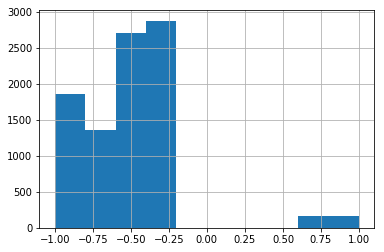

In [25]:
avo.lon_scaled.hist()
plt.show()

In [26]:
# 169
avo.sort_index(inplace=True)
avo.sort_values('region')
price = np.asarray(avo.AveragePrice)
#temp = avo.groupby('region').AveragePrice
#temp.
#print(8281/49)
price = price.reshape((49, 169))
len(price.T[0])

ValueError: cannot reshape array of size 9126 into shape (49,169)

In [27]:
y

array([ 0.01626052,  0.10436002,  0.08004271,  0.15556411,  0.07550755,
        0.09531018, -0.01081092,  0.05715841,  0.03540193,  0.04445176,
        0.08607461,  0.02666825,  0.09622803,  0.06701071,  0.0808521 ,
        0.07550755,  0.18232156,  0.26381459,  0.09402895,  0.20334092,
        0.21278076,  0.15057286,  0.        ,  0.13217177,  0.27731929,
        0.06169357,  0.06765865,  0.0314162 ,  0.20649192,  0.16068238,
        0.00947874,  0.25464222,  0.22677332, -0.06351341,  0.01307208,
        0.07622737,  0.07924937,  0.03278982,  0.01754431,  0.02620237,
        0.03738753, -0.13657554,  0.03960914,  0.08872812,  0.08535985,
        0.03822121,  0.18571715,  0.06765865,  0.11488028,  0.08638461,
        0.24557059,  0.06124363,  0.06524052,  0.20430046])

In [28]:
y = np.diff(np.log(price.T[0]))
y = np.insert(y, 0, 0)

IndexError: list assignment index out of range

In [29]:
y

array([ 0.01626052,  0.10436002,  0.08004271,  0.15556411,  0.07550755,
        0.09531018, -0.01081092,  0.05715841,  0.03540193,  0.04445176,
        0.08607461,  0.02666825,  0.09622803,  0.06701071,  0.0808521 ,
        0.07550755,  0.18232156,  0.26381459,  0.09402895,  0.20334092,
        0.21278076,  0.15057286,  0.        ,  0.13217177,  0.27731929,
        0.06169357,  0.06765865,  0.0314162 ,  0.20649192,  0.16068238,
        0.00947874,  0.25464222,  0.22677332, -0.06351341,  0.01307208,
        0.07622737,  0.07924937,  0.03278982,  0.01754431,  0.02620237,
        0.03738753, -0.13657554,  0.03960914,  0.08872812,  0.08535985,
        0.03822121,  0.18571715,  0.06765865,  0.11488028,  0.08638461,
        0.24557059,  0.06124363,  0.06524052,  0.20430046])

In [30]:
print(len([1]*54), len(list(avo[avo.region == 'Albany'].lat)))

54 169


In [31]:
#price = price.reshape((54, 169))
#np.asarray([1]*52) + price[0]

X = np.column_stack([[1]*169, list(avo[avo.region == 'Albany'].lat)])
X


array([[  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,  42.6511674],
       [  1.       ,

In [32]:
y = price.T[0].T

In [33]:
y.shape


()

In [39]:
np.dot(np.dot(np.dot(X.T,X),X.T),y)



array([[   282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902,    282992.58108902,
           282992.58108902,    282992.58108902, 

In [40]:
avo.groupby('index')

KeyError: 'index'

In [41]:
avo.AveragePrice.apply(lambda x: np.log(x))

Date
2015-01-04   -0.083382
2015-01-04    0.009950
2015-01-04    0.019803
2015-01-04    0.019803
2015-01-04    0.095310
2015-01-04    0.048790
2015-01-04   -0.127833
2015-01-04   -0.030459
2015-01-04    0.198851
2015-01-04   -0.116534
2015-01-04   -0.051293
2015-01-04    0.000000
2015-01-04    0.086178
2015-01-04   -0.261365
2015-01-04   -0.342490
2015-01-04   -0.301105
2015-01-04    0.285179
2015-01-04   -0.030459
2015-01-04    0.086178
2015-01-04   -0.010050
2015-01-04   -0.010050
2015-01-04    0.009950
2015-01-04    0.122218
2015-01-04   -0.162519
2015-01-04   -0.061875
2015-01-04   -0.287682
2015-01-04   -0.020203
2015-01-04    0.000000
2015-01-04    0.000000
2015-01-04   -0.030459
                ...   
2018-03-25    0.207014
2018-03-25    0.139762
2018-03-25    0.277632
2018-03-25   -0.072571
2018-03-25    0.223144
2018-03-25    0.019803
2018-03-25    0.207014
2018-03-25    0.262364
2018-03-25    0.246860
2018-03-25   -0.010050
2018-03-25    0.076961
2018-03-25    0.336472
2018-0

In [42]:
#avo.logPrice

In [43]:
#y = column of price per region
#x = column of 1s, and 
avo['logPrice'] = avo.AveragePrice.apply(np.log)
avo['logPriceDiff'] = avo.groupby('region').logPrice.transform(pd.Series.diff).fillna(0)
avo.head()

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,Date
Date,,,,,,,,,,
2015-01-04,0.92,-85.759407,38.254238,Louisville,101162.98,-0.461864,-0.263734,-0.083382,0.0,2015-01-04
2015-01-04,1.01,-83.046640,42.331551,Detroit,369694.27,-0.422318,-0.023189,0.009950,0.0,2015-01-04
2015-01-04,1.02,-86.158350,39.768333,Indianapolis,160130.15,-0.467680,-0.174408,0.019803,0.0,2015-01-04
2015-01-04,1.02,-84.682435,43.621195,GreatLakes,3382800.12,-0.446164,0.052894,0.019803,0.0,2015-01-04
2015-01-04,1.10,-82.549600,36.967486,Midsouth,2578275.12,-0.415072,-0.339647,0.095310,0.0,2015-01-04


In [44]:
len(y)

TypeError: object of type 'numpy.float64' has no len()

In [45]:
# **** Look into this
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

array([[  3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
          3.76936272e-03,   3.76936272e-03,   3.76936272e-03,
        

In [46]:
# do OLS on y_i = x_iT B + e_i
# Y = X B + e
# hat(B) = (X^TX)^-1X^T Y


In [47]:
#avocado.Date = pd.to_datetime(avocado.Date)
#avocado = avocado.set_index('Date')
avo = avocado[avocado.type == 'conventional'][['AveragePrice', 'lon', 'lat', 'region', 'Total Volume']]
avo.head()

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60


In [48]:
albAvo = avo[avo.region == 'Albany']
albAvo['logPrice'] = albAvo.AveragePrice.apply(log)
mean_price = albAvo.logPrice.mean()

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
albAvo['logPriceDiff'] = albAvo.logPrice.apply(lambda x: x-mean_price)

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
errors = 

SyntaxError: invalid syntax (<ipython-input-50-f3daf89f30a3>, line 1)

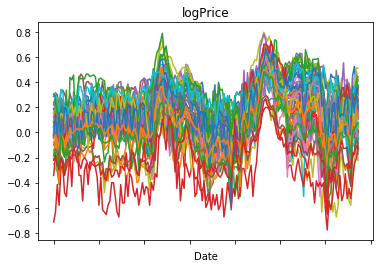

In [51]:
avo['logPrice'] = avo.AveragePrice.apply(log)
avo.groupby('region').logPrice.plot()
plt.title('logPrice')
plt.show()

In [52]:
avo['logPrice'] = avo.AveragePrice.apply(log)
avo['logDiffPriceMonth'] = avo.groupby('region').logPrice.transform(lambda x:x.diff(4))

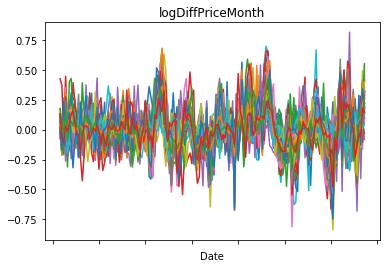

In [53]:
avo.groupby('region').logDiffPriceMonth.plot()
plt.title('logDiffPriceMonth')
plt.show()

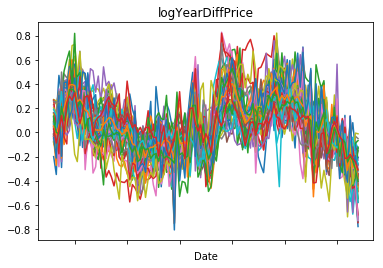

In [54]:
#avo['logYearPrice'] = 
avo['logYearDiffPrice'] = avo.groupby('region')['logPrice'].transform(lambda x: x.diff(52))
avo.groupby('region').logYearDiffPrice.plot()
plt.title('logYearDiffPrice')
plt.show()

In [55]:
avo

,AveragePrice,lon,lat,region,Total Volume,logPrice,logDiffPriceMonth,logYearDiffPrice
Date,,,,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62,0.285179,NaN,NaN
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98,0.300105,NaN,NaN
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22,-0.072571,NaN,NaN
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15,0.076961,NaN,NaN
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60,0.246860,-0.038319,NaN
2015-11-22,1.26,-73.754968,42.651167,Albany,55979.78,0.231112,-0.068993,NaN
2015-11-15,0.99,-73.754968,42.651167,Albany,83453.76,-0.010050,0.062520,NaN
2015-11-08,0.98,-73.754968,42.651167,Albany,109428.33,-0.020203,-0.097164,NaN
2015-11-01,1.02,-73.754968,42.651167,Albany,99811.42,0.019803,-0.227057,NaN


In [56]:
meanLogPrice = avo.groupby('region').logPrice.mean()
meanLogPrice

region
Albany                 0.286488
Atlanta                0.053274
BaltimoreWashington    0.283339
Boise                  0.047832
Boston                 0.251977
BuffaloRochester       0.318411
California             0.080360
Charlotte              0.230992
Chicago                0.287650
CincinnatiDayton      -0.006987
Columbus               0.049277
DallasFtWorth         -0.178556
Denver                 0.054055
Detroit                0.099237
GrandRapids            0.253310
GreatLakes             0.152314
HarrisburgScranton     0.222807
HartfordSpringfield    0.330190
Houston               -0.207797
Indianapolis           0.119389
Jacksonville           0.155498
LasVegas              -0.001347
LosAngeles            -0.051358
Louisville             0.083618
MiamiFtLauderdale      0.206358
Midsouth               0.180171
Nashville             -0.000204
NewOrleansMobile       0.063579
NewYork                0.323364
Northeast              0.286180
NorthernNewEngland     0.218685
O

In [57]:
avo.head()

,AveragePrice,lon,lat,region,Total Volume,logPrice,logDiffPriceMonth,logYearDiffPrice
Date,,,,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62,0.285179,NaN,NaN
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98,0.300105,NaN,NaN
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22,-0.072571,NaN,NaN
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15,0.076961,NaN,NaN
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60,0.246860,-0.038319,NaN


In [58]:
avo['logDiffPrice'] = avo.logPrice.diff()
avo.head()

,AveragePrice,lon,lat,region,Total Volume,logPrice,logDiffPriceMonth,logYearDiffPrice,logDiffPrice
Date,,,,,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62,0.285179,NaN,NaN,NaN
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98,0.300105,NaN,NaN,0.014926
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22,-0.072571,NaN,NaN,-0.372675
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15,0.076961,NaN,NaN,0.149532
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60,0.246860,-0.038319,NaN,0.169899


In [59]:

# noise = 
# \bar{price} + lat*price_{diff} + lon*price_{diff} + volume - price
#meanLogPrice + avo.lat*avo.logDiffPrice + avo.lon*avo.logDiffPrice + avo['Total Volume'] - avo.logPrice

In [60]:
# avocado['LogAvePriceDiff'] = avocado.AveragePrice.apply(lambda x: np.log(x)).diff()
# avocado.LogAvePriceDiff.plot()
# plt.show()

In [61]:
avocado['LogAveragePrice'] = avocado.AveragePrice.apply(np.log)
avocado.Date = pd.to_datetime(avocado.Date)
avocado.set_index('Date', inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Date'

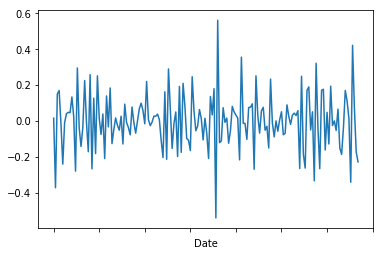

In [62]:

#avocado[avocado.type == 'conventional'].groupby('region').LogAveragePrice.transform(pd.Series.diff)[1:].plot()
avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice.diff()[1:].plot() # can use volume to explain variance in middle
#avocado.LogAvePriceDiff.plot()
plt.show()

In [63]:
albAvo = avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice

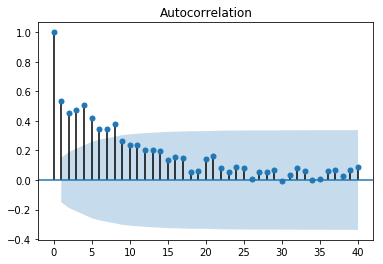

In [64]:
sm.graphics.tsa.plot_acf(albAvo, lags=40)
plt.show() # AR 4 or 5

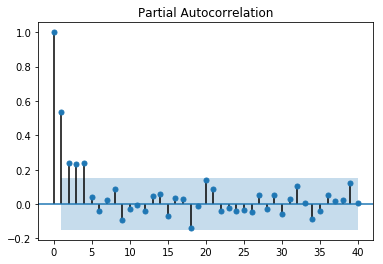

In [65]:
sm.graphics.tsa.plot_pacf(albAvo, lags=40)
plt.show() # MA 1 or 2

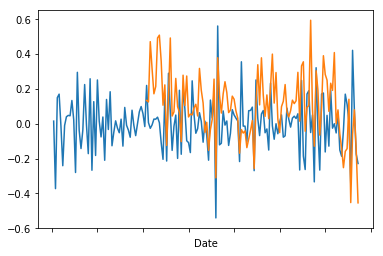

In [66]:
albAvo.diff().plot()
albAvo.diff(52).plot()
plt.show()

In [67]:
# q1 - 1 - 3
# q2 - 4 - 6
# q3 - 7 - 9
# q4 - 10-12

#quarterly_averages = 
albAvo = avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice

from collections import defaultdict

monthly_total = defaultdict(list)

for month, x in [(row[0].month, row[1]) for row in albAvo.iteritems()]:
  monthly_total[month] += [x]

quarterly_total = defaultdict(list)
for month in monthly_total:
  quarter = (month-1)//3
  quarterly_total[quarter] += monthly_total[month]

quarterly_average = quarterly_total.copy()
for key in quarterly_average:
  quarterly_average[key] = sum(quarterly_average[key])/len(quarterly_average[key])

quarterly_average

AttributeError: 'str' object has no attribute 'month'

In [68]:
albAvo.reset_index().apply(lambda x: x.LogAveragePrice-quarterly_average[(x.Date.month-1)//3], axis=1).diff()[1:].plot()
plt.show()

NameError: ("name 'quarterly_average' is not defined", 'occurred at index 0')

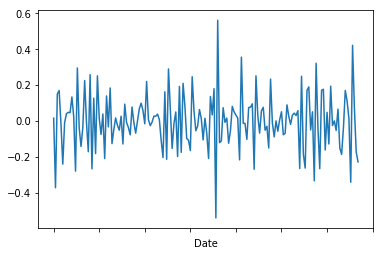

In [69]:
albAvo.diff()[1:].plot() # can use volume to explain variance in middle
#albAvo.reset_index().apply(lambda x: x.LogAveragePrice-quarterly_average[(x.Date.month-1)//3], axis=1).diff()[1:].plot()
plt.show()

In [70]:
#albAvo # diff and diff(52) were tried
mod = sm.tsa.statespace.SARIMAX(albAvo, order=(2,1,0), seasonal_order=(0,0,0,0), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:      D.LogAveragePrice   No. Observations:                  168
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 100.087
Date:                Wed, 28 Nov 2018   AIC                           -194.174
Time:                        16:31:44   BIC                           -184.802
Sample:                    12-20-2015   HQIC                          -190.370
                         - 01-07-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5583      0.069     -8.074      0.000      -0.694      -0.423
ar.L2         -0.3430      0.090     -3.823      0.000      -0.519      -0.167
sigma2         0.0177      0.002      8.993      0.0

In [71]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [72]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [73]:
min_bic = 0
best_tuple = None

for p in [1,2,3,4,5,6,7,8]:
  for d in [0, 1]:
    for q in [0,1,2,3,4]:
#      if d > 0 and q > 0:
#        pass
      model = ARIMA(albAvo, order=(p,d,q))
      model_fit = model.fit(disp=0)
      if model_fit.bic < min_bic:
        min_bic = model_fit.bic
        best_tuple = (p,d,q)
print(min_bic, best_tuple)
#      print((p,d,q), model_fit.bic)
      #print((p, d, q), evaluate_arima_model(albAvo, (p,d,q)))
# (5, 0, 0) -189.18887997903266

/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimizat

LinAlgError: SVD did not converge

In [ ]:
print(min_bic, best_tuple)